Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your github nickname below:

In [1]:
NICKNAME = "alexandra-i"

---

# Метод Монте-Карло в физике

Методами Монте-Карло называют множество различных методов в совершенно разных областях от физики до экономики. Основная суть этих методов заключается в использовании случайных величин для получения различных состояний исследуемой системы. 

Одно из частых применений метода Монте-Карло в физике состоит в расчете интегралов. При этом действительно полезным и незаменимым метод становится при работе с большим количеством измерений, когда построение обычных квадратур приводит к чересчур  огромным сеткам. Например, уже в случае 10 измерений, задание обычной равномерной решетки шириной в $2^4 = 16$ узлов, приводит к общей сетке размера $2^{40} \simeq 10^{12}$. Массив данных float такого размера будет занимать 4ТБ в памяти компьютера. Оперировать такими интегралами стандартными методами становится принципиально невозможно.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sp
plt.style.use('ggplot')

## Задание 1
Вычислим объем многомерной сферы в большом количестве измерений.

### Задание 1.1 
Напишите функцию, вычисляющую точный объем $d$-мерной сферы с помощью явного выражения. 
Объем многомерной сферы радиуса $R$ в $d$-измерениях дается формулой: 
$$
V_d = \frac{\pi^{d/2}} {\Gamma(1 + d/2)}
$$
где $\Gamma(x)$ - гамма функция, значение которой можно получить из scipy.special.

In [3]:
def getSphereVolumeExact(D, R = 1.0):
    """
    Функция вычисляет значение объема D-мерной сферы радиуса R по явной формуле

    --------
    Аргументы:
    D - int, количество измерений 
    R = 1 - float, радиус сферы
    --------
    Функция возвращает:
    V - float, объем сферы
    """
    V=np.pi**(D/2)/sp.gamma(1+D/2)
    return V

1. Проверьте результат для нескольких известных вам значений. 
2. Построите график V(D)

Действительно, при d=1 V=2.0;  при d=2 V=pi=3.141592653589793


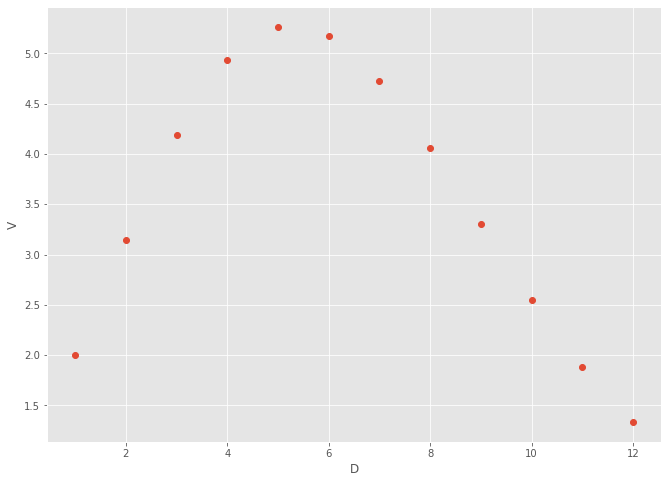

In [4]:
D_arr=np.linspace(1,12,12)
V_arr=np.array([getSphereVolumeExact(d, R = 1.0) for d in D_arr])
plt.figure(figsize=(11,8))
plt.xlabel('D')
plt.ylabel('V')
plt.plot(D_arr,V_arr,'o')
print('Действительно, при d=1 V={};'.format(V_arr[0]), ' при d=2 V=pi={}'.format(V_arr[1]))

### Задание 1.2
Напишите функцию, вычисляющую объем сферы методом Монте-Карло на псевдослучайных числах (используя, например `numpy.random.rand`).

In [5]:
def getSphereVolumePseudorandom(N, D, R = 1):
    """
    Функция вычисляет значение объема D-мерной сферы радиуса R методом Монте-Кало на псевдослучайных числах

    --------
    Аргументы:
    N - int, количество случайных точек
    D - int, количество измерений 
    R = 1 - float, радиус сферы
    --------
    Функция возвращает:
    V - float, объем сферы
    """
    c=np.random.uniform(low=-1, high=1, size=(D, N))
    c2=c**2
    r2=np.array([c2.T[k].sum() for k in range(N)])
    in_sphere=np.array([r2<R**2])
    n=in_sphere.sum()
    V0=2**D
    V=V0*n/N
    return V

Постройте график зависимости относительной точности $\epsilon$ которая достигается при фиксированном $N$ от размерности сферы $D$. Для относительной точности используйте выражение $\epsilon = (V_{exact} - V_{random})/V_{exact}$.

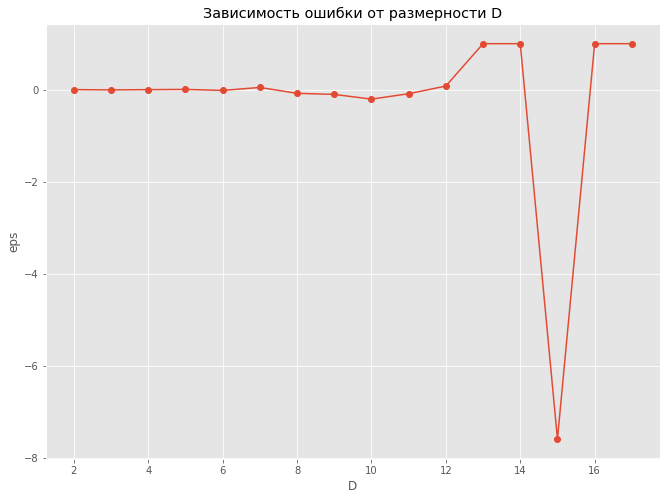

In [6]:
N=10000
D_arr=np.linspace(2,17,16)
V_exact=np.array([getSphereVolumeExact(d, R = 1.0) for d in D_arr])
V_random=np.array([getSphereVolumePseudorandom(N, D=int(d), R = 1.0) for d in D_arr])
eps=(V_exact-V_random)/V_exact
plt.figure(figsize=(11,8))
plt.title('Зависимость ошибки от размерности D')
plt.xlabel('D')
plt.ylabel('eps')
plt.plot(D_arr,eps,'o-')

### Задание 1.3
Напишите функцию, вычисляющую объем сферы методом Монте-Карло на квазислучайной последовательности Соболя.

Для установки библиотеки `sobol_seq`:


выполните `pip install sobol_seq` в Jupyter или

выполните команду `pip install sobol_seq --user` в командном окне (если вы используете Jupyter Notebook в составе Anaconda откройте Anaconda Prompt и выполните команду pip в ней, после чего перезапустите Jupyter Notebook).


In [7]:
!pip install sobol_seq 
import sobol_seq

Defaulting to user installation because normal site-packages is not writeable


Используйте функцию `i4_sobol_generate`. Документацию по ней можно получить выполнив следующую строчку кода:

In [8]:
sobol_seq.i4_sobol_generate?

In [9]:
def getSphereVolumeQuasirandom(N, D, R = 1):
    """
    Функция вычисляет значение объема D-мерной сферы радиуса R методом Монте-Кало на квазислучайных числах

    --------
    Аргументы:
    N - int, количество случайных точек
    D - int, количество измерений 
    R = 1 - float, радиус сферы
    --------
    Функция возвращает:
    V - float, объем сферы
    """
    c=sobol_seq.i4_sobol_generate(D, N)
    c2=c**2
    r2=np.array([c2[k].sum() for k in range(N)])
    in_sphere=np.array([r2<R**2])
    n=in_sphere.sum()
    V0=2**D
    V=V0*n/N
    return V

Сравните точность вычисления объема для квазислучайной и псевдослучайной последовательностей, рассчитав  $\epsilon(D)$, при таком же значении $N$, как в предыдущем задании. Постройте обе зависимости $\epsilon(D)$ на одном графике в логарифмической шкале по $\epsilon$.

0.00140    -0.00013
-0.01184    -0.00019
-0.01159    -0.00122
-0.02071    -0.00308
0.00428    0.00428
0.07077    0.02742
-0.09749    0.05389
-0.05551    0.06867
0.15676    0.07645
0.45651    -0.08699
0.69324    0.38649
1.00000    1.00000
1.00000    1.00000
1.00000    1.00000
1.00000    1.00000
1.00000    1.00000


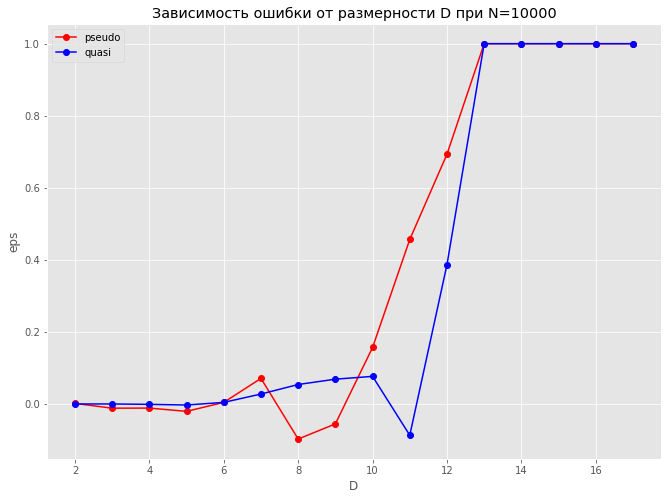

In [10]:
N=10000
D_arr=np.linspace(2,17,16)
V_exact=np.array([getSphereVolumeExact(d, R = 1.0) for d in D_arr])
V_random1=np.array([getSphereVolumePseudorandom(N, D=int(d), R = 1.0) for d in D_arr])
V_random2=np.array([getSphereVolumeQuasirandom(N, D=int(d), R = 1.0) for d in D_arr])
eps1=(V_exact-V_random1)/V_exact
eps2=(V_exact-V_random2)/V_exact
for i in range(16):
    print('{:.5f}'.format(eps1[i]), '{:.5f}'.format(eps2[i]), sep='    ')
plt.figure(figsize=(11,8))
plt.title('Зависимость ошибки от размерности D при N=10000')
plt.xlabel('D')
plt.ylabel('eps')
plt.plot(D_arr,eps1,'o-',c='red',label='pseudo')
plt.plot(D_arr,eps2,'o-',c='b',label='quasi')
plt.legend(loc='best')

Сделайте вывды о работе псевдослучайной и квазислучайной последовательностях. 

Метод Монте-Карло на квазислучайной последовательности более стабилен. 

# Задание 2

## Задание 2.1
Вычислите значение интеграла 
$$
\int d^d\mathbf{r} \frac{e^{-\mathbf{r}^T\mathbf{r}}}{1 + \mathbf{r}^T\mathbf{r}}, \;\mathbf{r} = (r_1, r_2, ..., r_d)
$$
по всему пространству, используя генерацию случайной величины с гауссовой плотностью.
Проведите результаты для $d=1,2,3,4,5$, используя разумной количество точек.
Для $d=1,2$ сравните с ответом, полученным \textit{любым} другим способом.

In [11]:
# Генерация случайной величины гауссовым распределением
D_arr=np.array(range(1,6))
N=100000
sigma=2**(-0.5)
I=np.array([])
for d in D_arr:
    c = np.random.normal(0, sigma, size=(d, N))
    c2 = c.T**2
    f=np.array([np.pi/(1+c2[k].sum()) for k in range(N)])
    i=f.sum()/N
    I=np.append(I,i)
    print('При d={} I={:.5f}'.format(int(d),i))
# При d=1 интеграл можно взять, пользуясь методом вычетов: 
I1=np.pi/2**0.5

# При d=2: заметив, что интеграл набирается в основном на масштабе x~1,5-2, меняем пределы интегрирования на 
# [-3^(1/2),3^(1/2)], a экспоненту раскладываем в нуле в ряд тейлора
I2=1.4506

print("""При d=1 ошибка составила {}.
В данном случае метод гауссовой плотности незначительно уступает методу вычетов.""".format(abs(I[0]-I1)))
print("""При d=2 явно более эффективным оказался метод гауссовой плотности, 
так как такая грубая замена пределов интегрирования чревата сильным снижением точности.""")

При d=1 I=2.38396
При d=2 I=1.87421
При d=3 I=1.52090
При d=4 I=1.26748
При d=5 I=1.08196
При d=1 ошибка составила 0.16251694056203592.
В данном случае метод гауссовой плотности незначительно уступает методу вычетов.
При d=2 явно более эффективным оказался метод гауссовой плотности, 
так как такая грубая замена пределов интегрирования чревата сильным снижением точности.


## Задание 2.2
Реализуйте функцию, возвращающую выборку случайной величины с плотностью $\omega(x) \propto \sqrt{1-x^2}, x\in[-1,1]$, используя rejection method.

In [12]:
def w(x):
    return (1-x**2)**0.5
def getSample(N):
    """
    Функция возвращает выборку случайных величин с распределнием ~sqrt(1-x^2) 

    --------
    Аргументы:
    N - int, количество случайных точек
    --------
    Функция возвращает:
    sample - numpy ndarray of float, массив случайных величин размера N
    """
    sample=np.array([])
    w_max=1
    while len(sample)<N:
        X=np.random.uniform(low=-1, high=1, size=(1))
        Y=np.random.uniform(low=0, high=1, size=(1))
        if w(X)>Y*w_max:
            sample=np.append(sample,X[0])
    return sample

Проверьте правильность, сгенерировав достаточно большой sample, и построив гистограмму.

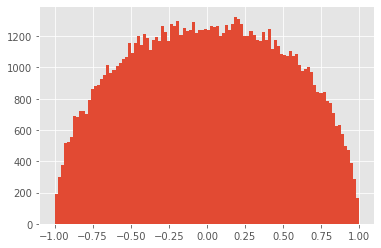

In [13]:
N=100000
plt.hist(getSample(N), 100)
plt.show()

# Задание 3

Рассмотрим решетку $n\times n$, в которой каждой ячейке соответствует спин $\sigma_i$ равный $+1$ или $-1$. При этом между соседними ячейками существует энергия взаимодействия
$$
E_i = -J \sigma_i \sigma_j
$$
Тогда энергия каждой ячейки 
$$
E_i = -J \sigma_i \sum_j \sigma_j
$$
где суммирование подразумевается только по соседним с $i$-ой ячейкой.

При нулевой температуре энергитически более выгодным состоянием является состояние, когда все спины одинаково ориентированы. Однако при ненулевой температуре вероятность перехода в более возбужденное состояние пропорциональна $\sim \exp(-\Delta E/ k T)$.

Явное численное моделирование такой системы (модели Изинга) является проблематичным, поскольку количество возможных состояний системы $2^N$, где $N$ - общее число узлов, и уже для двумерной сетки $16\times 16$ это число становится астрономически большим. 

На помощь приходят методы Монте-Карло. Одна из простейших его реализаций (алгоритм Метрополиса — Гастингса):
1. Задаем случайное начальное состояние
2. Выбираем случайную ячейку
3. Переворачиваем её спин и считаем изменение энергии $\delta E$ данной ячейки.
4. Если изменение энергии отрицательное, оставляем спин перевернутым
5. Если изменение энергии положительное, оставляем спин перевернутым с вероятностью $\exp(-\delta E/kT)$
6. Повторяем пункты 2-5 нужное количество раз

Спустя достаточно большое количество повторений устанавливается равновесное состояние. 

Реализуем данный алгоритм: 
1. Задайте начальное случайное расраспределение в виде матрицы из $+1$ и $-1$ размерности $N\times N$:

In [14]:
def getInitialState(N):
    '''
    Функция задает случайное начальное состояние
    ---------
    Аргументы:
    N - int, линейный размер решетки 
    --------
    Функция возвращает:
    state - numpy ndarray of ints, массив состояния системы размера NxN
    '''
    state=np.random.randint(low=0,high=1,size=(N,N))
    state[state==0] = -1
    return state

2. Напишите функцию, которая для ячейки $(i,j)$ расчитывает изменение её энергии, если изменить её знак. При этом для простоты предполагаем, во-первых, что $J=1$ (на него отнормируем kT), и во-вторых, что элементы находящиеся на верхней и нижней (левой и правой) границах находятся рядом друг с другом (топология тора).  


In [15]:
def getDeltaE(i, j, state):
    '''
    Функция расчитывает и возвращает изменение энергии ячейки (i,j) в случае ее переворота (не меняя состояния state)
    
    ---------
    Аргументы:
    i - int, адресс ячейки вдоль оси 0
    j - int, адресс ячейки вдоль оси 1
    state - numpy ndarray of ints, массив состояния системы размера NxN
    --------
    Функция возвращает:
    dE - float, изменение энергии
    '''
    E=state[i][j]*(state[(i+1)%N][j]+state[(i-1)%N][j]+state[i][(j+1)%N]+state[i][(j-1)%N])
    dE=2*E 
    return dE

3. Напишите функцию, которая $N^2$ раз для разных случайных $(i,j)$ меняет спин в зависимости от изменения энергии, согласно пунктам 4. и 5. 

In [16]:
def makeFlip(T, state):
    '''
    Функция N^2 раз переворачивает спин, и принимает решение оставить его перевернутым или нет, согласно правилам 4. и 5.
    
    ---------
    Аргументы:
    T - float, положительное число, безразмерный коэфициент, характеризующий температуру, равный kT/J
    state - numpy ndarray of ints, массив состояния системы размера NxN
    --------
    Функция возвращает:
    state - numpy ndarray of ints, массив нового состояния системы размера NxN
    '''
    spin=np.random.randint(0, N, size=(2))
    i,j=spin[0],spin[1]
    n=0
    while n<=len(state)**2:
        n+=1
        dE=getDeltaE(i, j, state)
        if dE<0:
            state[i][j] = -state[i][j]
        else:
            d_func=np.e**(-dE/T)
            x=np.random.uniform(low=0, high=1, size=(1))
            if x>d_func:
                state[i][j] = -state[i][j]
        spin=np.random.randint(0, N, size=(2))
        i,j=spin[0],spin[1]
    return state

4. Напишите функцию, которая будет рассчитывать значение энергии всей системы (предполагаем $J=1$).

In [17]:
def getEnergy(state):
    '''
    Функция, рассчитывает значение энергии всей системы
    ---------
    Аргументы:
    state - numpy ndarray of ints, массив состояния системы размера NxN
    --------
    Функция возвращает:
    E - float, значение энергии системы
    '''
    E=0
    for i in range(len(state)):
        for j in range(len(state)):
            dE=getDeltaE(i, j, state)
            E+=dE
    return E

5. Напишите функцию, которая будет рассчитывать значение намагниченности всей системы $M=\sum \sigma$

In [18]:
def getMagnetization(state):    
    '''
    Функция, рассчитывает значение намагниченности всей системы
    ---------
    Аргументы:
    state - numpy ndarray of ints, массив состояния системы размера NxN
    --------
    Функция возвращает:
    M - float, значение намагниченности системы
    '''
    M=0
    i=0
    for i in range(len(state)):
        M+=state[i].sum()
    return float(M)

В следующей ячейке кода зададим начальные параметры: 

**Nt** - количество точек по температуре, 

**N** - линейный размер решетки, 

**eqStep** - количество попыток переворота спина, в течение которых система приводится к равновесному сосотоянию. Обратите внимание, что это число должно увеличиваться пропорционально размеру всей сетки,

**steps** - количество попыток переворота спина, в течение которых рассчитывается значения энергии и намагниченности (нужно для усреднения расчитанных значений по ансамблю состояний, близких к равновесному)

In [19]:
N       = 10         # размер решетки NxN
Nt      = 10         # количество точек температуры
eqSteps = 150        # количество раз выполнения makeFlip для установления равновесия
steps   = 30         # количество раз выполнения makeFlip для усреднения энергии и намагниченности

T = np.linspace(0.5, 5, Nt); 
E, M = np.zeros(Nt), np.zeros(Nt)

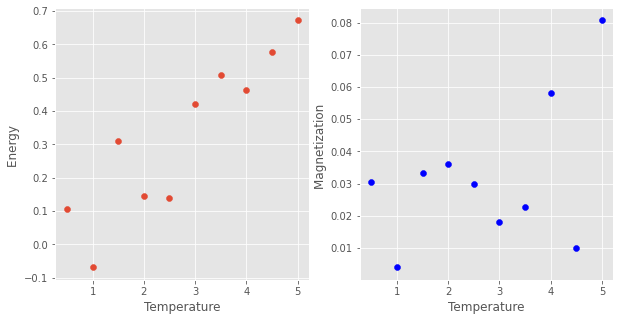

In [20]:
for t in range(Nt):
    print("Complete", t/Nt*100, '%\r', end='')
    
    Esum = Msum = 0
    state = getInitialState(N)
    
    for i in range(eqSteps):         # установление статистического равновесия
        makeFlip(T[t], state)          

    for i in range(steps):           # суммирование по разным состояниям близким к равновеснсому
        makeFlip(T[t], state)          
        Esum += getEnergy(state)       
        Msum += getMagnetization(state) 

    E[t] = Esum / (steps * N * N)
    M[t] = Msum / (steps * N * N)

print("Done              \r", end='')

_, ax = plt.subplots(1,2,figsize=(10, 5));

ax[0].scatter(T, E)
ax[0].set_xlabel("Temperature");
ax[0].set_ylabel("Energy ");

ax[1].scatter(T, abs(M), color = 'blue')
ax[1].set_xlabel("Temperature"); 
ax[1].set_ylabel("Magnetization ");

Интерпретируйте с точки зрения физики полученные графики. Описывают ли они поведение ферромагнетиков и фазовые переходы?

С ростом температуры средняя энергия системы повышается засчет того, что растет конецентрация перевернутых спинов.

Задайте новое сосотояние системы с достаточно большим $N$ и визуализируйте его думя цветами (например с помощью `plt.scatter`). Примените несколько раз к этому сосотоянию функциию makeFlip с низкой и с высокой температурами. Объясните наблюдаемое

In [21]:
N = 64
state = getInitialState(N)

raise NotImplementedError()

NotImplementedError: 

In [ ]:
plt.figure()
# Write your code here
makeFlip(0.5, state)
# YOUR CODE HERE
raise NotImplementedError()

YOUR ANSWER HERE